In [1]:
import statsmodels.api as sm
import statsmodels.tsa.arima.model as sma
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

def getData():
    df = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
    df.index = pd.date_range(start='1700', end='2009', freq='A')
    TEST_SZ = 5
    train = df[0:len(df)-TEST_SZ]
    test = df[len(df)-TEST_SZ:]
    return train, test

def buildModel(df, ar, i, ma):

    model = sma.ARIMA(df['SUNACTIVITY'], order=(ar, i, ma)).fit()

    return model

def predictAndEvaluate(model, test, title):
    print("\n***" + title)
    print(model.summary())
    predictions = model.predict(start='2010', end='2014')
    mse = mean_squared_error(predictions, test)
    rmse = np.sqrt(mse)
    print("RMSE: " + str(rmse))

train, test = getData()

for ar in range(0, 5):
    for ma in range(0, 5):
        model = buildModel(train, ar, 0, ma)
        title = str(ar) + "_0_" + str(ma)
        predictAndEvaluate(model, test, title)



***0_0_0
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                          ARIMA   Log Likelihood               -1556.444
Date:                Thu, 10 Feb 2022   AIC                           3116.888
Time:                        21:23:27   BIC                           3124.322
Sample:                    12-31-1700   HQIC                          3119.862
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2553      2.986     16.829      0.000      44.402      56.108
sigma2      1638.9508    156.964     10.442      0.000    1331.308    1946.594
Ljung-Box (L1) (Q):                 206.97

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib


***0_0_3
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1313.530
Date:                Thu, 10 Feb 2022   AIC                           2637.060
Time:                        21:23:28   BIC                           2655.645
Sample:                    12-31-1700   HQIC                          2644.495
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9047      4.646     10.741      0.000      40.798      59.011
ma.L1          1.2954      0.045     29.013      0.000       1.208       1.383
ma.L2          1.0066      0.067     15.10

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)



***1_0_0
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1385.154
Date:                Thu, 10 Feb 2022   AIC                           2776.308
Time:                        21:23:28   BIC                           2787.459
Sample:                    12-31-1700   HQIC                          2780.769
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7866      9.796      5.082      0.000      30.587      68.986
ar.L1          0.8220      0.036     22.696      0.000       0.751       0.893
sigma2       529.1510     39.825     13.28

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE: 33.346989548790816

***1_0_3
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -1302.231
Date:                Thu, 10 Feb 2022   AIC                           2616.462
Time:                        21:23:28   BIC                           2638.764
Sample:                    12-31-1700   HQIC                          2625.383
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2417      6.712      7.485      0.000      37.087      63.397
ar.L1          0.4937      0.093      5.300      0.000       0.311       0.676
ma.L1          0.

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)



***1_0_4
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -1312.390
Date:                Thu, 10 Feb 2022   AIC                           2638.781
Time:                        21:23:28   BIC                           2664.800
Sample:                    12-31-1700   HQIC                          2649.189
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1391      8.180      6.130      0.000      34.107      66.171
ar.L1          0.9657      0.071     13.543      0.000       0.826       1.105
ma.L1          0.3387      0.092      3.67

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)



***2_0_2
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1284.946
Date:                Thu, 10 Feb 2022   AIC                           2581.891
Time:                        21:23:29   BIC                           2604.193
Sample:                    12-31-1700   HQIC                          2590.812
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9233      3.693     13.518      0.000      42.685      57.162
ar.L1          1.4439      0.078     18.535      0.000       1.291       1.597
ar.L2         -0.7468      0.064    -11.60

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)



***2_0_4
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -1274.413
Date:                Thu, 10 Feb 2022   AIC                           2564.827
Time:                        21:23:29   BIC                           2594.563
Sample:                    12-31-1700   HQIC                          2576.722
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9099      3.544     14.081      0.000      42.963      56.857
ar.L1          1.5608      0.040     38.585      0.000       1.481       1.640
ar.L2         -0.9103      0.033    -27.51

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)



***3_0_1
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -1284.555
Date:                Thu, 10 Feb 2022   AIC                           2581.111
Time:                        21:23:29   BIC                           2603.413
Sample:                    12-31-1700   HQIC                          2590.032
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9330      3.713     13.447      0.000      42.655      57.211
ar.L1          0.8432      0.299      2.821      0.005       0.257       1.429
ar.L2          0.1252      0.413      0.30

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  w

RMSE: 43.68697659763654

***3_0_3
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1284.553
Date:                Thu, 10 Feb 2022   AIC                           2585.106
Time:                        21:23:30   BIC                           2614.842
Sample:                    12-31-1700   HQIC                          2597.001
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9308      3.747     13.325      0.000      42.586      57.275
ar.L1          0.8530      0.695      1.228      0.220      -0.509       2.215
ar.L2          0.1

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)



***3_0_4
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -1259.243
Date:                Thu, 10 Feb 2022   AIC                           2536.486
Time:                        21:23:30   BIC                           2569.939
Sample:                    12-31-1700   HQIC                          2549.868
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.4609      6.872      7.197      0.000      35.991      62.930
ar.L1          2.5208      0.045     55.785      0.000       2.432       2.609
ar.L2         -2.3963      0.077    -31.31

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)



***4_0_1
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(4, 0, 1)   Log Likelihood               -1284.555
Date:                Thu, 10 Feb 2022   AIC                           2583.111
Time:                        21:23:30   BIC                           2609.130
Sample:                    12-31-1700   HQIC                          2593.519
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9303      3.718     13.428      0.000      42.642      57.218
ar.L1          0.8400      0.619      1.357      0.175      -0.373       2.053
ar.L2          0.1291      0.797      0.16

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Max


***4_0_2
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -1282.403
Date:                Thu, 10 Feb 2022   AIC                           2580.806
Time:                        21:23:31   BIC                           2610.542
Sample:                    12-31-1700   HQIC                          2592.701
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0543      3.918     12.774      0.000      42.375      57.734
ar.L1         -0.3185      0.076     -4.165      0.000      -0.468      -0.169
ar.L2          0.8081      0.057     14.22

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)



***4_0_3
                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  304
Model:                 ARIMA(4, 0, 3)   Log Likelihood               -1280.577
Date:                Thu, 10 Feb 2022   AIC                           2579.153
Time:                        21:23:31   BIC                           2612.607
Sample:                    12-31-1700   HQIC                          2592.535
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1673      3.606     13.912      0.000      43.099      57.235
ar.L1         -0.0061      0.121     -0.051      0.960      -0.244       0.231
ar.L2          0.5248      0.060      8.69

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


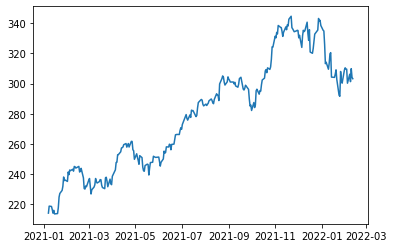


***0_0_0
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                          ARIMA   Log Likelihood               -1368.100
Date:                Fri, 11 Feb 2022   AIC                           2740.200
Time:                        07:56:20   BIC                           2747.419
Sample:                             0   HQIC                          2743.097
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.3492      2.210    126.376      0.000     275.017     283.682
sigma2      1319.2748    178.655      7.384      0.000     969.117    1669.433
Ljung-Box (L1) (Q):                 269.28

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. 

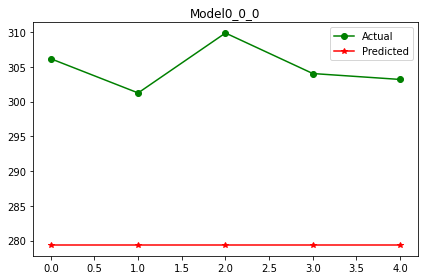


***0_0_1
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1199.350
Date:                Fri, 11 Feb 2022   AIC                           2404.700
Time:                        07:56:20   BIC                           2415.529
Sample:                             0   HQIC                          2409.047
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.1974      2.271    122.946      0.000     274.747     283.648
ma.L1          0.9420      0.021     44.141      0.000       0.900       0.984
sigma2       380.1595     44.566      8.53

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

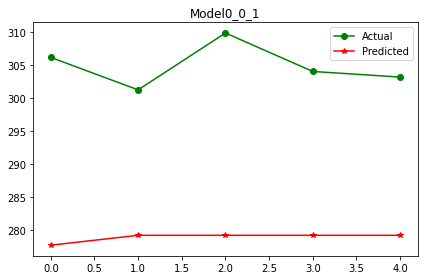

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. 


***0_0_2
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1153.308
Date:                Fri, 11 Feb 2022   AIC                           2314.616
Time:                        07:56:20   BIC                           2329.054
Sample:                             0   HQIC                          2320.412
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.2972      2.964     94.214      0.000     273.487     285.108
ma.L1          0.9199      0.008    117.045      0.000       0.905       0.935
ma.L2          0.9954      0.015     67.13

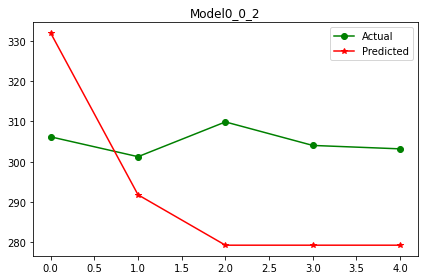

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par


***0_0_3
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1004.026
Date:                Fri, 11 Feb 2022   AIC                           2018.052
Time:                        07:56:20   BIC                           2036.099
Sample:                             0   HQIC                          2025.297
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.0220      2.570    108.553      0.000     273.984     284.060
ma.L1          1.5075      0.043     35.301      0.000       1.424       1.591
ma.L2          1.3838      0.060     22.96

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


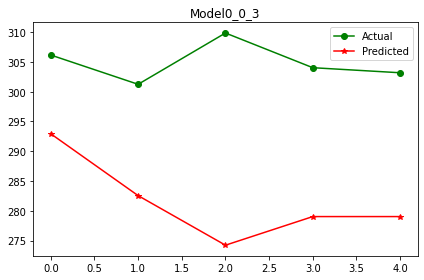

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par


***0_0_4
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -939.795
Date:                Fri, 11 Feb 2022   AIC                           1891.590
Time:                        07:56:20   BIC                           1913.247
Sample:                             0   HQIC                          1900.283
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        278.9549      2.982     93.543      0.000     273.110     284.800
ma.L1          1.7926      0.044     41.178      0.000       1.707       1.878
ma.L2          1.9867      0.078     25.55

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


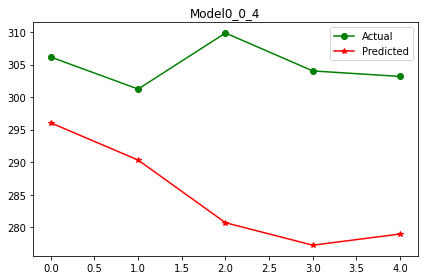

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



***1_0_0
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -761.057
Date:                Fri, 11 Feb 2022   AIC                           1528.115
Time:                        07:56:20   BIC                           1538.943
Sample:                             0   HQIC                          1532.462
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.5828     28.018      9.479      0.000     210.669     320.497
ar.L1          0.9955      0.005    196.284      0.000       0.986       1.005
sigma2        15.1860      0.895     16.96

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


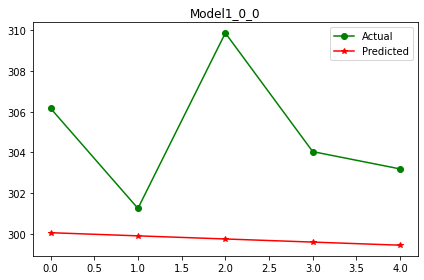

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



***1_0_1
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -760.890
Date:                Fri, 11 Feb 2022   AIC                           1529.780
Time:                        07:56:20   BIC                           1544.218
Sample:                             0   HQIC                          1535.576
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.8670     27.377      9.711      0.000     212.208     319.526
ar.L1          0.9951      0.005    186.995      0.000       0.985       1.006
ma.L1          0.0391      0.058      0.67

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


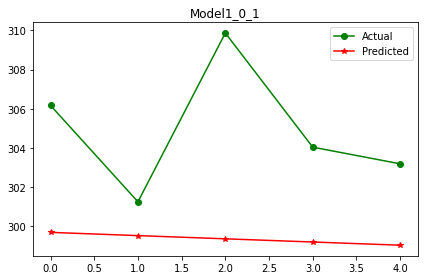

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. 


***1_0_2
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -760.116
Date:                Fri, 11 Feb 2022   AIC                           1530.232
Time:                        07:56:21   BIC                           1548.280
Sample:                             0   HQIC                          1537.477
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.1261     30.922      9.027      0.000     218.519     339.733
ar.L1          0.9962      0.005    198.856      0.000       0.986       1.006
ma.L1          0.0342      0.059      0.58

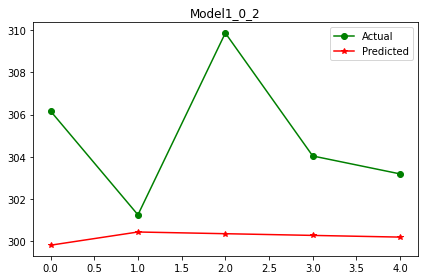

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



***1_0_3
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -760.113
Date:                Fri, 11 Feb 2022   AIC                           1532.227
Time:                        07:56:21   BIC                           1553.883
Sample:                             0   HQIC                          1540.920
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.1344     31.148      8.961      0.000     218.085     340.184
ar.L1          0.9962      0.005    199.355      0.000       0.986       1.006
ma.L1          0.0350      0.059      0.59

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


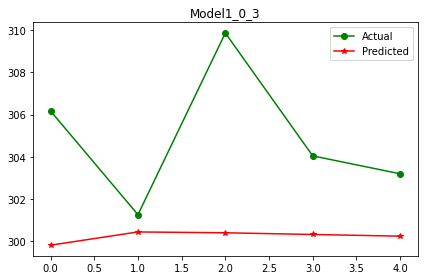

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



***1_0_4
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(1, 0, 4)   Log Likelihood                -759.654
Date:                Fri, 11 Feb 2022   AIC                           1533.309
Time:                        07:56:21   BIC                           1558.575
Sample:                             0   HQIC                          1543.451
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.1213     29.265      9.538      0.000     221.762     336.481
ar.L1          0.9956      0.005    186.238      0.000       0.985       1.006
ma.L1          0.0390      0.060      0.64

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


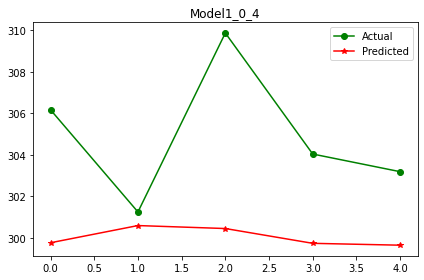

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



***2_0_0
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -760.919
Date:                Fri, 11 Feb 2022   AIC                           1529.837
Time:                        07:56:21   BIC                           1544.275
Sample:                             0   HQIC                          1535.633
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.7997     27.455      9.681      0.000     211.989     319.610
ar.L1          1.0277      0.058     17.683      0.000       0.914       1.142
ar.L2         -0.0323      0.058     -0.55

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


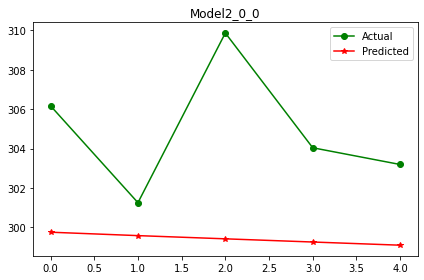

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autore


***2_0_1
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -760.590
Date:                Fri, 11 Feb 2022   AIC                           1531.180
Time:                        07:56:21   BIC                           1549.228
Sample:                             0   HQIC                          1538.425
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.8484     27.403      9.701      0.000     212.139     319.558
ar.L1          0.5910      0.798      0.741      0.459      -0.973       2.155
ar.L2          0.4022      0.795      0.50

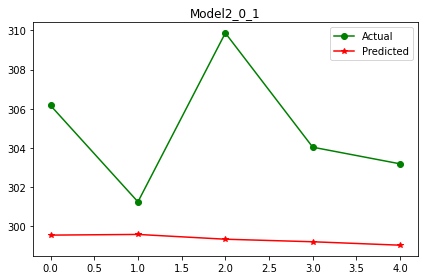


***2_0_2
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -760.110
Date:                Fri, 11 Feb 2022   AIC                           1532.221
Time:                        07:56:21   BIC                           1553.877
Sample:                             0   HQIC                          1540.914
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        278.7337     30.911      9.017      0.000     218.149     339.318
ar.L1          1.0260      0.696      1.475      0.140      -0.338       2.390
ar.L2         -0.0297      0.693     -0.04

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. 

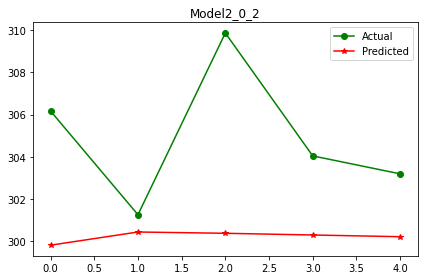

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization fai


***2_0_3
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -759.353
Date:                Fri, 11 Feb 2022   AIC                           1532.707
Time:                        07:56:22   BIC                           1557.973
Sample:                             0   HQIC                          1542.849
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.1899     30.524      8.688      0.000     205.365     325.015
ar.L1          0.1814      0.308      0.589      0.556      -0.422       0.785
ar.L2          0.8120      0.306      2.65

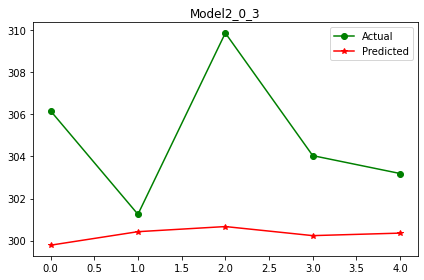

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization fai


***2_0_4
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(2, 0, 4)   Log Likelihood                -758.835
Date:                Fri, 11 Feb 2022   AIC                           1533.671
Time:                        07:56:22   BIC                           1562.546
Sample:                             0   HQIC                          1545.262
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.5663     28.101      9.450      0.000     210.488     320.644
ar.L1          0.3592      0.345      1.040      0.298      -0.318       1.036
ar.L2          0.6336      0.344      1.84

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


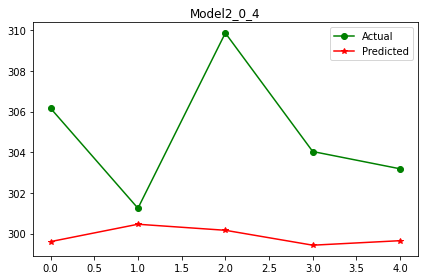


***3_0_0
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -760.042
Date:                Fri, 11 Feb 2022   AIC                           1530.085
Time:                        07:56:22   BIC                           1548.132
Sample:                             0   HQIC                          1537.329
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.1534     31.173      8.955      0.000     218.056     340.251
ar.L1          1.0306      0.058     17.755      0.000       0.917       1.144
ar.L2         -0.1193      0.076     -1.56

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. 

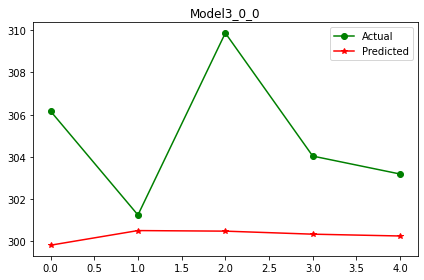

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



***3_0_1
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -759.954
Date:                Fri, 11 Feb 2022   AIC                           1531.907
Time:                        07:56:22   BIC                           1553.564
Sample:                             0   HQIC                          1540.601
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.2184     28.922      9.170      0.000     208.533     321.904
ar.L1          0.9903      0.606      1.635      0.102      -0.197       2.178
ar.L2         -0.0783      0.609     -0.12

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


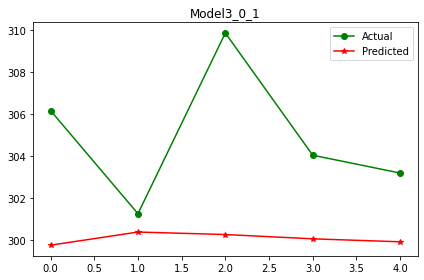

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization fai


***3_0_2
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -755.146
Date:                Fri, 11 Feb 2022   AIC                           1524.292
Time:                        07:56:22   BIC                           1549.559
Sample:                             0   HQIC                          1534.435
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.2765     32.998      8.463      0.000     214.602     343.951
ar.L1         -0.3731      0.041     -9.198      0.000      -0.453      -0.294
ar.L2          0.4574      0.029     15.59

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


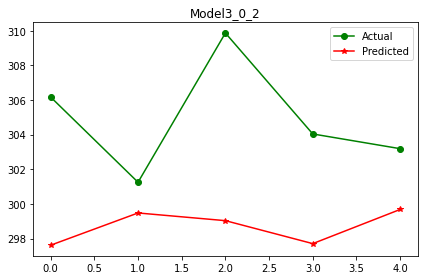

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization fai


***3_0_3
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -758.191
Date:                Fri, 11 Feb 2022   AIC                           1532.382
Time:                        07:56:23   BIC                           1561.258
Sample:                             0   HQIC                          1543.974
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.2704    308.511      0.905      0.365    -325.400     883.941
ar.L1          1.9166      0.073     26.236      0.000       1.773       2.060
ar.L2         -1.8215      0.131    -13.90

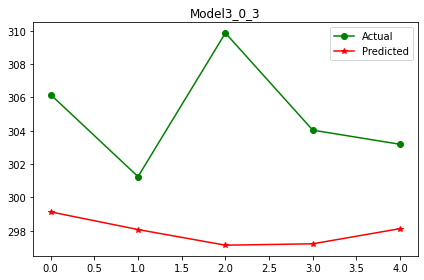

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



***3_0_4
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(3, 0, 4)   Log Likelihood                -754.871
Date:                Fri, 11 Feb 2022   AIC                           1527.742
Time:                        07:56:23   BIC                           1560.227
Sample:                             0   HQIC                          1540.782
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.3072     31.275      8.931      0.000     218.010     340.605
ar.L1         -0.3590      0.056     -6.430      0.000      -0.468      -0.250
ar.L2          0.4593      0.037     12.26

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


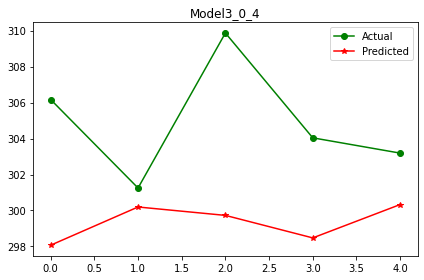

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. 


***4_0_0
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -759.952
Date:                Fri, 11 Feb 2022   AIC                           1531.903
Time:                        07:56:23   BIC                           1553.560
Sample:                             0   HQIC                          1540.597
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.2421     28.843      9.196      0.000     208.710     321.774
ar.L1          1.0309      0.059     17.493      0.000       0.915       1.146
ar.L2         -0.1201      0.082     -1.46

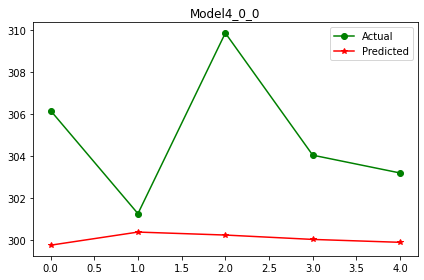

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization fai


***4_0_1
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -759.524
Date:                Fri, 11 Feb 2022   AIC                           1533.049
Time:                        07:56:23   BIC                           1558.315
Sample:                             0   HQIC                          1543.191
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        264.9823     29.258      9.057      0.000     207.637     322.328
ar.L1          0.1747      0.304      0.575      0.565      -0.420       0.770
ar.L2          0.7640      0.304      2.50

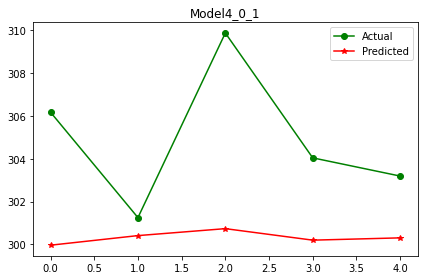

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autore


***4_0_2
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -754.947
Date:                Fri, 11 Feb 2022   AIC                           1525.895
Time:                        07:56:24   BIC                           1554.770
Sample:                             0   HQIC                          1537.486
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.3114     29.711      9.401      0.000     221.078     337.545
ar.L1         -0.3883      0.067     -5.754      0.000      -0.521      -0.256
ar.L2          0.4392      0.047      9.42

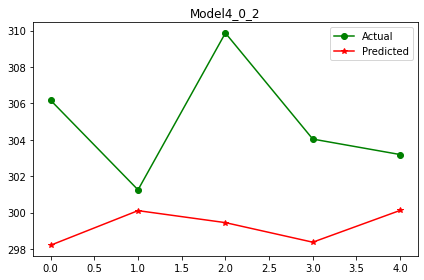

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autore


***4_0_3
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(4, 0, 3)   Log Likelihood                -759.712
Date:                Fri, 11 Feb 2022   AIC                           1537.424
Time:                        07:56:24   BIC                           1569.909
Sample:                             0   HQIC                          1550.464
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.2977     39.919      6.997      0.000     201.057     357.538
ar.L1         -0.2435      3.027     -0.080      0.936      -6.176       5.689
ar.L2         -0.0471      1.827     -0.02

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


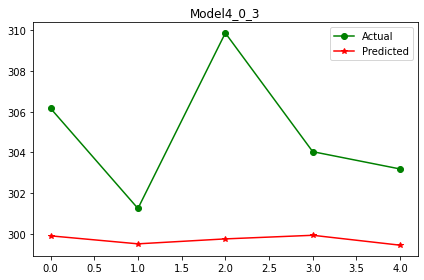

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



***4_0_4
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  273
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -754.889
Date:                Fri, 11 Feb 2022   AIC                           1529.778
Time:                        07:56:24   BIC                           1565.873
Sample:                             0   HQIC                          1544.267
                                - 273                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.2750     31.388      8.897      0.000     217.755     340.795
ar.L1         -0.0031      3.266     -0.001      0.999      -6.405       6.398
ar.L2          0.5777      1.111      0.52

/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ryanleung/miniforge3/envs/COMP-4949/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


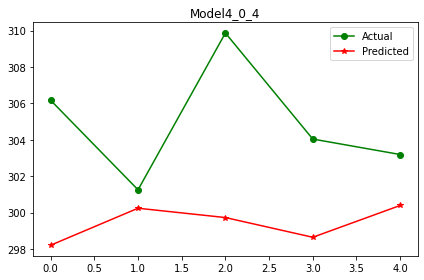

In [5]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
dta = sm.datasets.sunspots.load_pandas().data

import datetime
import pandas_datareader as pdr

def getStock(stk, ttlDays):
    numDays = int(ttlDays)
    dt = datetime.date.today()
    dtPast = dt + datetime.timedelta(days=-numDays)
    df = pdr.get_data_yahoo(stk,
                            start=datetime.datetime(dtPast.year, dtPast.month,
                                                    dtPast.day),
                            end=datetime.datetime(dt.year, dt.month, dt.day))
    return df

stkName = 'MSFT'
dfStock = getStock(stkName, 400)

# Split the data.
NUM_TEST_DAYS = 5
lenData        = len(dfStock)
dfTrain        = dfStock.iloc[0:lenData - NUM_TEST_DAYS, :]
dfTest         = dfStock.iloc[lenData-NUM_TEST_DAYS:,:]

plt.plot(dfStock.index, dfStock['Open'])
plt.show()

def buildModel(df, ar, i, ma):
    model = ARIMA(df['Open'], order=(ar, i, ma)).fit()
    return model

def predictAndEvaluate(model, test, title, ar, ma):
    print("\n***" + title)
    print(model.summary())
    start = len(dfTrain)
    end = start + len(dfTest) - 1
    predictions = model.predict(start=start, end=end, dynamic=True)
    mse = mean_squared_error(predictions, test['Open'])
    rmse = np.sqrt(mse)
    print("RMSE: " + str(rmse))
    plt.plot(test['Open'].values, label='Actual', marker='o', color='green')
    plt.plot(predictions.values, label='Predicted', marker='*', color='red')
    plt.legend()
    plt.title("Model" + str(ar) + "_0_" + str(ma))
    plt.tight_layout()
    plt.show()

for ar in range(0, 5):
    for ma in range(0, 5):
        model = buildModel(dfTrain, ar, 0, ma)
        title = str(ar) + "_0_" + str(ma)
        predictAndEvaluate(model, dfTest, title, ar, ma)


History length: 3643
Model parameters: [0.77522705]
>predicted=7.752, expected=12.900
History length: 3644
Model parameters: [0.77517487]
>predicted=10.000, expected=14.600
History length: 3645
Model parameters: [0.77522914]
>predicted=11.318, expected=14.000
History length: 3646
Model parameters: [0.77524048]
>predicted=10.853, expected=13.600
History length: 3647
Model parameters: [0.77525231]
>predicted=10.543, expected=13.500
History length: 3648
Model parameters: [0.77527009]
>predicted=10.466, expected=15.700
History length: 3649
Model parameters: [0.77538737]
>predicted=12.174, expected=13.000
Test RMSE: 3.765


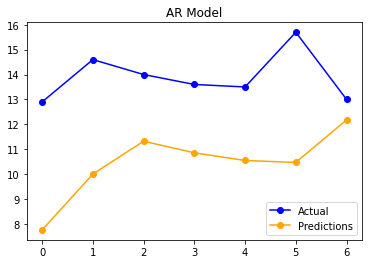

In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
import statsmodels.tsa.arima.model as sma
from sklearn.metrics import mean_squared_error
from math import sqrt

PATH = "../datasets/"
series = read_csv(PATH + 'daily-min-temperatures.csv', header=0, index_col=0)

# Split the data set so the test set is 7.
NUM_TEST_DAYS = 7
X    = series.values
size = len(X) - NUM_TEST_DAYS
train, test = X[0:size], X[size:]

# Create a list with the training array.
history = [x for x in train]
predictions = []

# predict() receives the model coefficients and all past data (t-1, t-2, t-2) etc.
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef) + 1):
        # Make the prediction (yhat)
        # This multiplies L1coeff*L1
        # and L2coeff*L2 if it exists
        # and L3coeff*L3 if it exists
        yhat += coef[i - 1] * history[-i]
    return yhat  # Return the prediction.

for t in range(len(test)):
    print("History length: " + str(len(history)))

    #################################################################
    # Model building and prediction section.
    model = sma.ARIMA(history, order=(1, 0, 0)).fit()

    print("Model parameters: " + str(model.arparams))
    # Get the ar_modle parameters.
    ar_coef = model.arparams

    # Make the prediction.
    yhat = predict(ar_coef, history)
    #################################################################

    predictions.append(yhat)  # Store the prediction in a list.

    obs = test[t]  # Get the actual current value.
    history.append(obs)  # Append the actual current value to the history list.
    # Actual values will be used as t-1, t-2 etc next iteration.
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test, label='Actual', marker='o', color='blue')
plt.plot(predictions, label='Predictions', marker='o', color='orange')
plt.legend()
plt.title("AR Model")
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


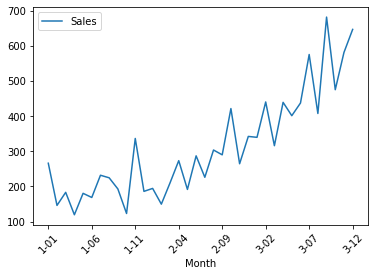

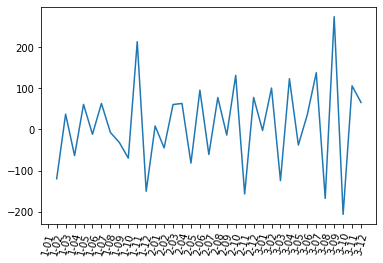

In [13]:
# Differencing
import pandas as pd
import datetime

import matplotlib.pyplot as plt
PATH = "../datasets/"
FILE = 'shampoo.csv'
df   = pd.read_csv(PATH + FILE, index_col=0)
df.info()

# Plot data before differencing.
df.plot()
plt.xticks(rotation=45)
plt.show()

# Perform differencing.
df = df.diff()

# Plot data after differencing.
plt.plot(df)
plt.xticks(rotation=75)
plt.show()

    value
0      88
1      84
2      85
3      85
4      84
..    ...
95    222
96    228
97    226
98    222
99    220

[100 rows x 1 columns]


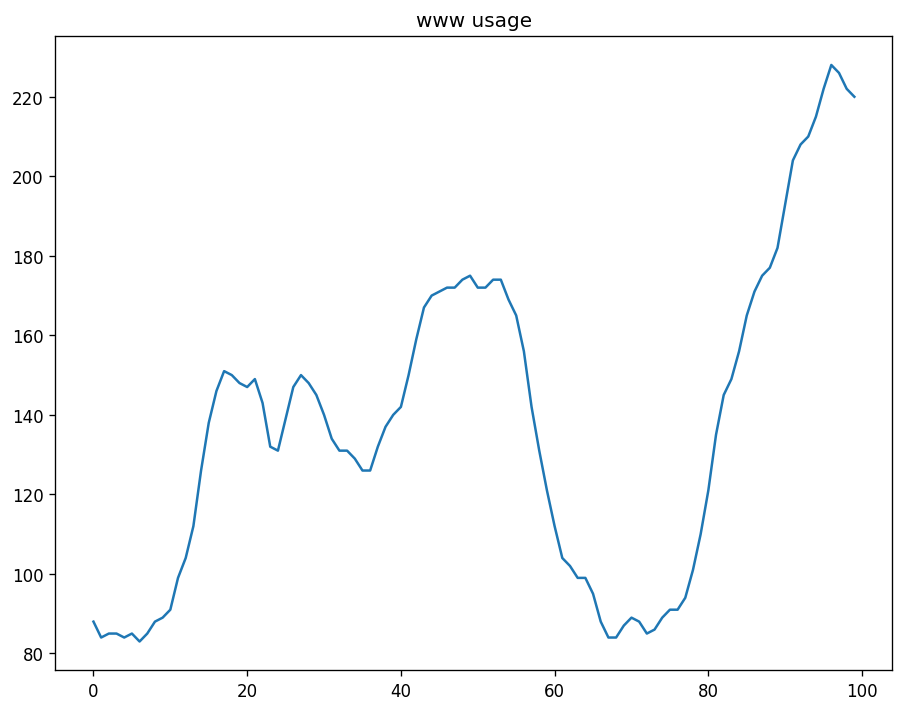

ADF Statistic: -2.464240
p-value: 0.124419


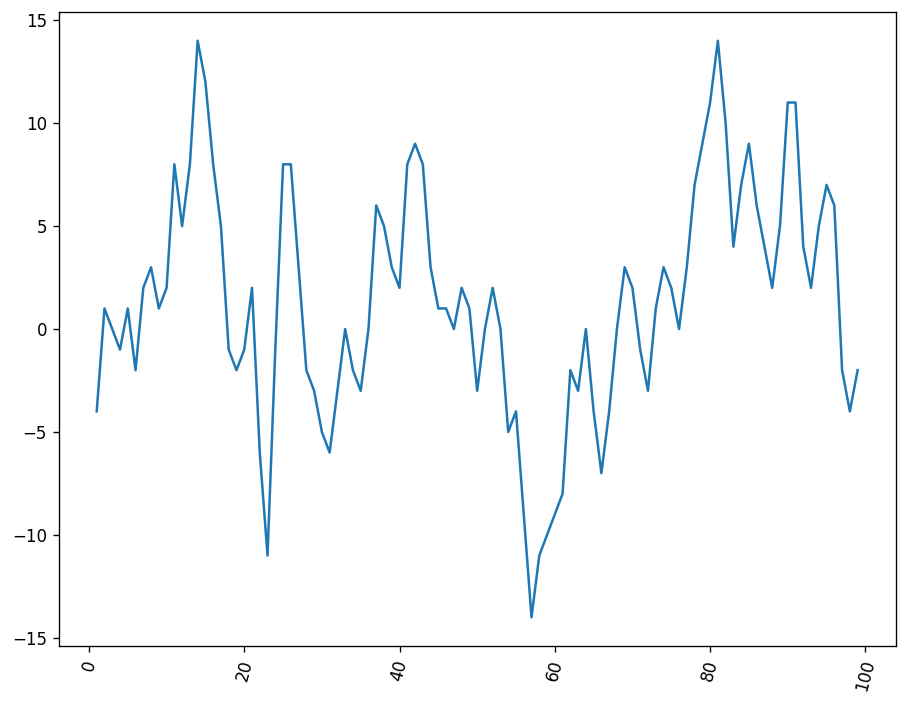

ADF Statistic: -2.722238
p-value: 0.070268


In [16]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv",
    names=['value'], header=0)
print(df)
df.value.plot()
plt.title("www usage")
plt.show()

from statsmodels.tsa.stattools import adfuller
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Perform differencing.
df = df.diff()

# Plot data after differencing.
plt.plot(df)
plt.xticks(rotation=75)
plt.show()

result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import statsmodels.tsa.arima.model as sma
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

PATH = "../datasets/"
series = read_csv(PATH + 'daily-min-temperatures.csv', header=0, index_col=0)

# Split the data set so the test set is 7.
NUM_TEST_DAYS = 7
X    = series.values
size = len(X) - NUM_TEST_DAYS
train, test = X[0:size], X[size:]

# Create a list with the training array.
history = [x for x in train]
predictions = []

def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)


# predict() receives the model coefficients and all past data (t-1, t-2, t-2) etc.
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef) + 1):
        # Make the prediction (yhat)
        # This multiplies L1coeff*L1
        # and L2coeff*L2 if it exists
        # and L3coeff*L3 if it exists
        yhat += coef[i - 1] * history[-i]
    return yhat  # Return the prediction.

for t in range(len(test)):
    print("History length: " + str(len(history)))

    #################################################################
    # Model building and prediction section.
    model = sma.ARIMA(history, order=(1, 1, 1)).fit()
    ar_coef, ma_coef = model.arparams, model.maparams
    resid = model.resid
    diff = difference(history)
    yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
    #################################################################

    predictions.append(yhat)  # Store the prediction in a list.

    obs = test[t]  # Get the actual current value.
    history.append(obs)  # Append the actual current value to the history list.
    # Actual values will be used as t-1, t-2 etc next iteration.
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test, label='Actual', marker='o', color='blue')
plt.plot(predictions, label='Predictions', marker='o', color='orange')
plt.legend()
plt.title("AR Model")
plt.show()

/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (/opt/homebrew/anaconda3/envs/COMP-3948/lib/python3.9/site-packages/scipy/signal/signaltools.py)

In [ ]:
from pandas                        import read_csv
import matplotlib.pyplot           as plt
from   statsmodels.tsa.arima_model import ARIMA
from   sklearn.metrics             import mean_squared_error
from   math                        import sqrt
import warnings
PATH   = "../datasets/"
series = read_csv(PATH + 'daily-min-temperatures.csv', header=0, index_col=0)

# Evaluate an ARIMA model for a given order (p,d,q).
def evaluate_arima_model(X, arima_order):
    # Prepare training dataset.
    train_size  = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history     = [x for x in train]

    # Make predictions.
    predictions = list()

    for t in range(len(test)):
        model       = ARIMA(history, order=arima_order)
        model_fit   = model.fit(disp=0)
        yhat        = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # Calculate out of sample error,
    error = mean_squared_error(test, predictions)
    return error

# Evaluate combinations of p, d and q values for an ARIMA model.
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order, mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# Set parameter ranges.
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

# Evaluate performance.
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=15.818
ARIMA(0, 0, 1) MSE=8.882
ARIMA(0, 0, 2) MSE=7.471
ARIMA(0, 1, 0) MSE=6.829
ARIMA(0, 1, 1) MSE=6.325
ARIMA(1, 0, 0) MSE=6.091


History length: 3643
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3643
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -8369.287
Date:                Thu, 10 Feb 2022   AIC                          16750.575
Time:                        22:54:36   BIC                          16787.778
Sample:                             0   HQIC                         16763.825
                               - 3643                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0572      0.018      3.160      0.002       0.022       0.093
ar.L1          1.4851      0.019     80.106      0.000       1.449       1.521
ar.L2         -0.6205      0.02

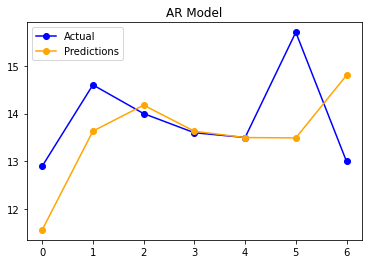

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import statsmodels.tsa.arima.model as sma
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import pmdarima as pm

PATH = "../datasets/"
series = read_csv(PATH + 'daily-min-temperatures.csv', header=0, index_col=0)

# Split the data set so the test set is 7.
NUM_TEST_DAYS = 7
X    = series.values
size = len(X) - NUM_TEST_DAYS
train, test = X[0:size], X[size:]

# Create a list with the training array.
history = [x for x in train]
predictions = []

def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)


# predict() receives the model coefficients and all past data (t-1, t-2, t-2) etc.
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef) + 1):
        # Make the prediction (yhat)
        # This multiplies L1coeff*L1
        # and L2coeff*L2 if it exists
        # and L3coeff*L3 if it exists
        yhat += coef[i - 1] * history[-i]
    return yhat  # Return the prediction.

for t in range(len(test)):
    print("History length: " + str(len(history)))

    #################################################################
    # Model building and prediction section.
    # Build day ahead model.
    model = pm.auto_arima(history, start_p=1, start_q=1,
                          test='adf',
                          max_p=3, max_q=3, m=0,
                          start_P=0, seasonal=False,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

    print(model.summary())
    fc, confint = model.predict(n_periods=1,
                                return_conf_int=True)
    yhat = fc[0]
    #################################################################

    predictions.append(yhat)  # Store the prediction in a list.

    obs = test[t]  # Get the actual current value.
    history.append(obs)  # Append the actual current value to the history list.
    # Actual values will be used as t-1, t-2 etc next iteration.
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test, label='Actual', marker='o', color='blue')
plt.plot(predictions, label='Predictions', marker='o', color='orange')
plt.legend()
plt.title("AR Model")
plt.show()

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
           Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000
History length: 358
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  358
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1207.708
Date:                Thu, 10 Feb 2022   AIC                           2423.415
Time:                        23:00:20   BIC                           2438.937
Sample:                             0   HQIC                          2429.588
                                - 358                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z

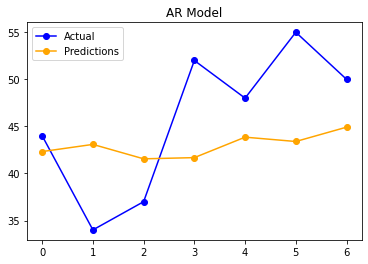

In [5]:
from pandas import read_csv
import matplotlib.pyplot as plt
import statsmodels.tsa.arima.model as sma
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import pmdarima as pm


PATH = "../datasets/"
df = read_csv(PATH + 'daily-total-female-births.csv', header=0, index_col=0)

print(df.head())
print(df.describe())

# Split the data set so the test set is 7.
NUM_TEST_DAYS = 7
X    = df.values
size = len(X) - NUM_TEST_DAYS
train, test = X[0:size], X[size:]

# Create a list with the training array.
history = [x for x in train]
predictions = []

def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)


# predict() receives the model coefficients and all past data (t-1, t-2, t-2) etc.
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef) + 1):
        # Make the prediction (yhat)
        # This multiplies L1coeff*L1
        # and L2coeff*L2 if it exists
        # and L3coeff*L3 if it exists
        yhat += coef[i - 1] * history[-i]
    return yhat  # Return the prediction.

for t in range(len(test)):
    print("History length: " + str(len(history)))

    #################################################################
    # Model building and prediction section.
    # Build day ahead model.
    model = pm.auto_arima(history, start_p=1, start_q=1,
                          test='adf',
                          max_p=3, max_q=3, m=0,
                          start_P=0, seasonal=False,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

    print(model.summary())
    fc, confint = model.predict(n_periods=1,
                                return_conf_int=True)
    yhat = fc[0]
    #################################################################

    predictions.append(yhat)  # Store the prediction in a list.

    obs = test[t]  # Get the actual current value.
    history.append(obs)  # Append the actual current value to the history list.
    # Actual values will be used as t-1, t-2 etc next iteration.
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test, label='Actual', marker='o', color='blue')
plt.plot(predictions, label='Predictions', marker='o', color='orange')
plt.legend()
plt.title("AR Model")
plt.show()